# Cantera

https://cantera.org/

Kernel: Python3 Ubuntu Linux

This example is from https://cantera.org/examples/jupyter/thermo/flame_temperature.ipynb.html

In [1]:
import cantera as ct
ct.__version__

'2.4.0'

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Get all of the Species objects defined in the GRI 3.0 mechanism
species = {S.name: S for S in ct.Species.listFromFile('gri30.cti')}

# Create an IdealGas object with species representing complete combustion
complete_species = [species[S] for S in ('CH4', 'O2', 'N2', 'CO2', 'H2O')]
gas1 = ct.Solution(thermo='IdealGas', species=complete_species)

phi = np.linspace(0.5, 2.0, 100)
T_complete = np.zeros(phi.shape)
for i in range(len(phi)):
    gas1.TP = 300, ct.one_atm
    gas1.set_equivalence_ratio(phi[i], 'CH4', 'O2:1, N2:3.76')
    gas1.equilibrate('HP')
    T_complete[i] = gas1.T

In [4]:
# Create an IdealGas object including incomplete combustion species
gas2 = ct.Solution(thermo='IdealGas', species=species.values())
T_incomplete = np.zeros(phi.shape)
for i in range(len(phi)):
    gas2.TP = 300, ct.one_atm
    gas2.set_equivalence_ratio(phi[i], 'CH4', 'O2:1, N2:3.76')
    gas2.equilibrate('HP')
    T_incomplete[i] = gas2.T

Text(0,0.5,'Temperature [K]')

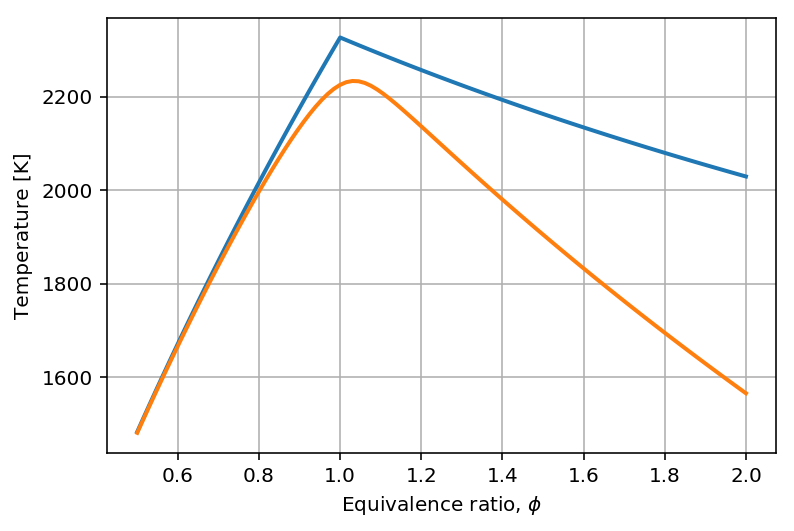

In [5]:
plt.plot(phi, T_complete, label='complete combustion', lw=2)
plt.plot(phi, T_incomplete, label='incomplete combustion', lw=2)
plt.grid(True)
plt.xlabel('Equivalence ratio, $\phi$')
plt.ylabel('Temperature [K]')

In [6]:
assert all(T_complete > 1000)

In [7]:
assert T_complete.shape[0] > 10